<a href="https://colab.research.google.com/github/FaisalMashuri/AVS1508/blob/master/Map_Pre_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Token Mapbox

pk.eyJ1Ijoid2luZGtybiIsImEiOiJjbDNwbnNuY2IxMDNwM2lwNzgwNzE0Mzc5In0.RZtcs6OlogXGlkVxSn8ZFQ

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 27.8 MB/s 
     |████████████████████████████████| 6.3 MB 48.4 MB/s 
     |████████████████████████████████| 16.7 MB 277 kB/s 


# Library

In [ ]:
import geopandas as gpd
import folium
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Geojson File

In [ ]:
pwk_geo = r'/content/drive/MyDrive/Skripsi Pre-Final/Choro-PWK/Salinan purwakarta_by_kec.json'

In [ ]:
geoPWK = gpd.read_file(pwk_geo)
geoPWK

OBJECTID    PROVINSI     KECAMATAN PROVNO KABKOTNO KECNO      KABKOT  \
0         15  JAWA BARAT  BABAKANCIKAO     32       14   101  PURWAKARTA   
1         54  JAWA BARAT        BOJONG     32       14   070  PURWAKARTA   
2         69  JAWA BARAT    BUNGURSARI     32       14   112  PURWAKARTA   
3         73  JAWA BARAT       CAMPAKA     32       14   110  PURWAKARTA   
4         96  JAWA BARAT        CIBATU     32       14   111  PURWAKARTA   
5        235  JAWA BARAT     DARANGDAN     32       14   060  PURWAKARTA   
6        281  JAWA BARAT     JATILUHUR     32       14   010  PURWAKARTA   
7        338  JAWA BARAT    KIARAPEDES     32       14   081  PURWAKARTA   
8        389  JAWA BARAT        MANIIS     32       14   020  PURWAKARTA   
9        454  JAWA BARAT     PASAWAHAN     32       14   090  PURWAKARTA   
10       470  JAWA BARAT        PLERED     32       14   040  PURWAKARTA   
11       472  JAWA BARAT  PONDOK SALAM     32       14   091  PURWAKARTA   
12       480  JAWA BARAT    PURWAKARTA     32       14   100  PURWAKARTA   
13       557  JAWA BARAT      SUKASARI     32       14   011  PURWAKARTA   
14       559  JAWA BARAT      SUKATANI     32       14   050  PURWAKARTA   
15       603  JAWA BARAT    TEGAL WARU     32       14   030  PURWAKARTA   
16       622  JAWA BARAT      WANAYASA     32       14   080  PURWAKARTA   

    ID_KAB     ID_KEC  Shape_Leng  Shape_Area  \
0   3214.0  3214101.0    0.329620    0.003914   
1   3214.0  3214070.0    0.551907    0.006387   
2   3214.0  3214112.0    0.406602    0.003761   
3   3214.0  3214110.0    0.503188    0.004582   
4   3214.0  3214111.0    0.489583    0.004852   
5   3214.0  3214060.0    0.617511    0.005021   
6   3214.0  3214010.0    0.524987    0.003337   
7   3214.0  3214081.0    0.443540    0.004907   
8   3214.0  3214020.0    0.552986    0.004560   
9   3214.0  3214090.0    0.304237    0.002588   
10  3214.0  3214040.0    0.289611    0.002519   
11  3214.0  3214091.0    0.465819    0.003184   
12  3214.0  3214100.0    0.265846    0.001973   
13  3214.0  3214011.0    1.113054    0.007264   
14  3214.0  3214050.0    0.758428    0.006451   
15  3214.0  3214030.0    0.502505    0.005270   
16  3214.0  3214080.0    0.519906    0.004562   

                                             geometry  
0   MULTIPOLYGON (((107.44729 -6.46572, 107.44758 ...  
1   MULTIPOLYGON (((107.49036 -6.63401, 107.49105 ...  
2   MULTIPOLYGON (((107.50642 -6.41127, 107.50693 ...  
3   MULTIPOLYGON (((107.52936 -6.41854, 107.52924 ...  
4   MULTIPOLYGON (((107.54666 -6.47108, 107.54693 ...  
5   MULTIPOLYGON (((107.40591 -6.64318, 107.40627 ...  
6   MULTIPOLYGON (((107.40369 -6.50452, 107.40380 ...  
7   MULTIPOLYGON (((107.57258 -6.58131, 107.57292 ...  
8   MULTIPOLYGON (((107.27390 -6.64140, 107.27398 ...  
9   MULTIPOLYGON (((107.48517 -6.54074, 107.48524 ...  
10  MULTIPOLYGON (((107.37278 -6.61568, 107.37317 ...  
11  MULTIPOLYGON (((107.52112 -6.56998, 107.52117 ...  
12  MULTIPOLYGON (((107.46965 -6.51581, 107.46998 ...  
13  MULTIPOLYGON (((107.33223 -6.48579, 107.33332 ...  
14  MULTIPOLYGON (((107.33023 -6.54383, 107.33032 ...  
15  MULTIPOLYGON (((107.36259 -6.57794, 107.36205 ...  
16  MULTIPOLYGON (((107.52735 -6.58104, 107.52753 ...

# Dataframe cluster kategorik

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Skripsi Pre-Final/Choro-PWK/HasilKMeans.csv',sep=';', engine='python')

In [ ]:
df

KECAMATAN  Jumlah UMKM  Jumlah Penduduk Miskin  Jumlah Pencari Kerja  \
0   BABAKANCIKAO          163                   19434                  1481   
1         BOJONG          102                   37369                   716   
2     BUNGURSARI          299                   19710                  1447   
3        CAMPAKA          335                   21239                  1998   
4         CIBATU          342                   17294                  1297   
5      DARANGDAN          210                   43782                  1130   
6      JATILUHUR          257                   33890                  2013   
7     KIARAPEDES          361                   20740                   452   
8         MANIIS          110                   29847                   415   
9      PASAWAHAN          171                   28829                  1477   
10        PLERED          187                   59090                  1477   
11  PONDOK SALAM           82                   21222                   818   
12    PURWAKARTA          861                   54088                  4448   
13      SUKASARI           70                   12171                   178   
14      SUKATANI           97                   41156                  1452   
15    TEGAL WARU          122                   39274                   653   
16      WANAYASA          210                   29970                   702   

     clusters  
0   Cluster 0  
1   Cluster 2  
2   Cluster 0  
3   Cluster 0  
4   Cluster 0  
5   Cluster 2  
6   Cluster 0  
7   Cluster 1  
8   Cluster 1  
9   Cluster 1  
10  Cluster 2  
11  Cluster 1  
12  Cluster 0  
13  Cluster 1  
14  Cluster 1  
15  Cluster 1  
16  Cluster 1

# Map 1 -Qualitative choroplet

In [ ]:
# Pilihan Warna px.colors.qualitative
# px.colors.qualitative.Plotly, px.colors.qualitative.Set1, D3, G10

In [ ]:
fig = px.choropleth(df, geojson=geoPWK, 
                      color="clusters",
                      locations="KECAMATAN", 
                      featureidkey="properties.KECAMATAN",
                      projection="mercator",
                      color_discrete_sequence=px.colors.qualitative.G10_r,
                      #color_continuous_scale='RdYlGn',
                    )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Dataframe Excel

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Skripsi Pre-Final/Choro-PWK/finalKMeans2.csv', sep=';', engine='python')

In [ ]:
df2

KECAMATAN  Jumlah UMKM  Jumlah Penduduk Miskin  Jumlah Pencari Kerja  \
0   BABAKANCIKAO          163                   19434                  1481   
1         BOJONG          102                   37369                   716   
2     BUNGURSARI          299                   19710                  1447   
3        CAMPAKA          335                   21239                  1998   
4         CIBATU          342                   17294                  1297   
5      DARANGDAN          210                   43782                  1130   
6      JATILUHUR          257                   33890                  2013   
7     KIARAPEDES          361                   20740                   452   
8         MANIIS          110                   29847                   415   
9      PASAWAHAN          171                   28829                  1477   
10        PLERED          187                   59090                  1477   
11  PONDOK SALAM           82                   21222                   818   
12    PURWAKARTA          861                   54088                  4448   
13      SUKASARI           70                   12171                   178   
14      SUKATANI           97                   41156                  1452   
15    TEGAL WARU          122                   39274                   653   
16      WANAYASA          210                   29970                   702   

    clusters  
0          0  
1          2  
2          0  
3          0  
4          0  
5          2  
6          0  
7          1  
8          1  
9          1  
10         2  
11         1  
12         0  
13         1  
14         1  
15         1  
16         1

# Map 2

In [ ]:
pwk = folium.Map(location=[-6.523839, 107.436310], zoom_start=10)

In [ ]:
pwk

In [ ]:
pwk.choropleth(
    geo_data =pwk_geo,
    data=df2,
    columns=['KECAMATAN','clusters'],
    key_on='feature.properties.KECAMATAN',
    fill_color='YlGnBu',
    bins=3,
    legend_name='cluster',
    categorical=True,
    legend=True,
)

pwk

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



# Map 3

In [ ]:
fig = px.choropleth(df2, geojson=geoPWK, 
                    color="clusters",
                    range_color=(0,2),
                    color_continuous_scale='RdYlGn',
                    #"YlGn",
                    locations="KECAMATAN", 
                    featureidkey="properties.KECAMATAN",
                    projection="mercator"
                   )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(coloraxis_colorbar=dict(
    thicknessmode="pixels", thickness=10,
    lenmode="pixels", len=150,
    yanchor="top", y=0.8,
    ticks="outside", ticksuffix="  cluster ",
    dtick=1
))

fig.show()

In [ ]:

fig = px.choropleth(df2, geojson=geoPWK, 
                    color="clusters",
                    locations="KECAMATAN", 
                    featureidkey="properties.KECAMATAN",
                    projection="mercator",
                    color_continuous_scale='RdYlGn'
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Datafarme merge

In [ ]:
df2merge = geoPWK.merge(df2, on='KECAMATAN')

In [ ]:
dfmerge = geoPWK.merge(df, on='KECAMATAN')

# Map 4

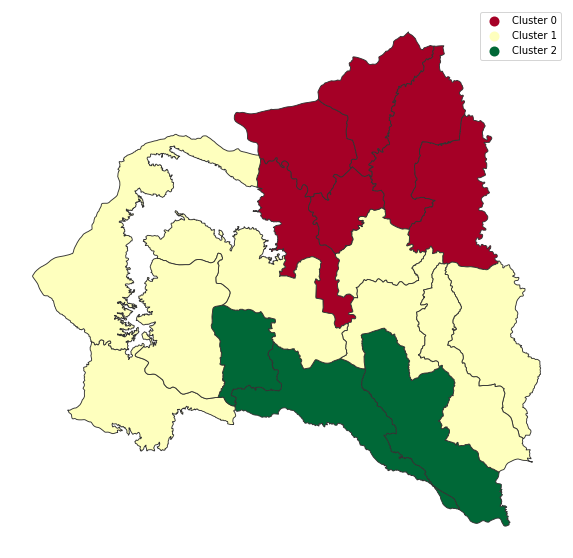

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(16,10))
ax = dfmerge.plot('clusters', 
             categorical=True, 
             legend=True, 
             linewidth=.9, 
             edgecolor='0.2',
             cmap='RdYlGn',
             legend_kwds={
                'loc': 'upper right' # Place legend on top right corner
                 },
              ax=ax)
ax.set_axis_off();

# Map 5

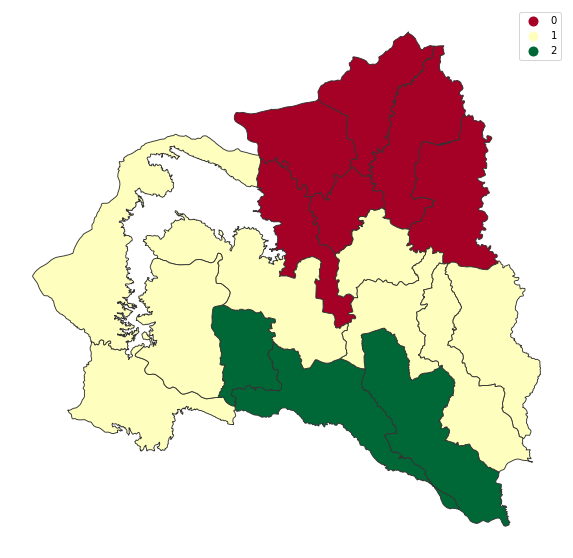

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(16,10))
ax = df2merge.plot('clusters', 
             categorical=True, 
             legend=True, 
             linewidth=.9, 
             edgecolor='0.2',
             cmap='RdYlGn',
             legend_kwds={
                'loc': 'upper right' # Place legend on top right corner
                 },
              ax=ax)
ax.set_axis_off();

https://nbviewer.org/github/etpinard/plotly-misc-nbs/blob/master/geo-maps/discrete-choropleths.ipynb#Suggestion-2:-split-data-into-several-choropleth-traces

/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:239: UserWarning:


/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:241: UserWarning:




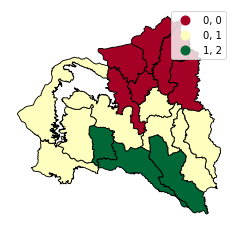

In [ ]:
ax = df2merge.plot(
    column='clusters', # Data to plot  
    scheme='Quantiles',                  # Classification scheme
    cmap='RdYlGn',                # Color palette
    edgecolor='k',               # Borderline color
    linewidth=0.9, 
    legend_kwds={'fmt':'{:.0f}'},              # Borderline width
    legend=True,                 # Add legend # Remove decimals in legend (for legibility)
)
ax.set_axis_off();

# Final

In [ ]:
fig = px.choropleth(df2, geojson=pwk_geo, 
                    color="clusters",
                    locations="KECAMATAN", 
                    featureidkey="properties.KECAMATAN",
                    projection="mercator",
                    color_continuous_scale='RdYlGn'
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.add_scattergeo(
  geojson=pwk_geo,
  locations = df2['KECAMATAN'],
  text = df2['KECAMATAN'],
  featureidkey="properties.KECAMATAN",
  mode = 'text') 
fig.show()

In [ ]:
mapboxtoken='pk.eyJ1Ijoid2luZGtybiIsImEiOiJjbDNwbnNuY2IxMDNwM2lwNzgwNzE0Mzc5In0.RZtcs6OlogXGlkVxSn8ZFQ'